In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# colors
color = sns.color_palette('pastel')

In [2]:
df = pd.read_csv('./netflix_titles.csv')
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [3]:
# df.info()

In [4]:
df.shape

(8807, 12)

In [5]:
# df.describe()

# Dropping missing values

In this project we are going to do:

* An study of the date where movies were added and realeased
* An study of the countries where movies were made 
* An inferencial analysis about the duration of the movies. 

Therefore, we will delete director and cast columns because they don't provide value for those objetives, and we will drop those missing values in the other columns because use missing values imputacion techniques is not good idea of all for columns such as: duration, date_added, and so on...

In [6]:
df2 = df.drop(['director', 'cast'], axis = 1).copy()

In [7]:
df2.dropna(inplace = True)

In [8]:
df2.shape

(7961, 10)

### Data transformation

#### deleting 's' in show_id values

In [9]:
df2['show_id'] = df2['show_id'].str.split('s').apply(lambda x: x[1]).copy()
df2['show_id'] = df2['show_id'].astype('int')
df2['show_id'].head()

0    1
1    2
4    5
7    8
8    9
Name: show_id, dtype: int32

#### separating month and year from date_added

In [10]:
df2['month_added'] = df2['date_added'].str.split().apply(lambda x: x[0]).copy()
df2['year_added'] = df2['date_added'].str.split().apply(lambda x: x[-1]).astype('int').copy()

In [11]:
df2.drop('date_added', axis = 1, inplace = True)

#### Let's extract all movies genres to make a column for each row within the data set

In [12]:
movies_gen = df2['listed_in'].values

In [13]:
ge = []
for i in range(len(movies_gen)):
    genres = movies_gen[i]
    ge+= genres.split(", ")
ge =list(set(ge))

In [14]:
c = pd.DataFrame(index = df2.index, columns= [g+' Genre' for g in ge]).fillna(0)   
df2 = pd.concat([df2, c], axis = 1)

In [15]:
# df2.head()

In [16]:
for i in df2.index:
    for x in [df2['listed_in'].loc[i]]:
        x2 = x.split(", ")
        for y in x2:
            df2[y+' Genre'].loc[i] = 1

In [17]:
df2.drop('listed_in', axis = 1, inplace = True)

#### To display in a better way this table let's create ranges of years

In [18]:
#df2['release_year'].min()
years = pd.cut(df2['release_year'], bins =11, precision = 2, right = False)


### Let's to analyze firts by movies genres and then by tv shows genres.

In [33]:
movies = df2[df2['type'] == 'Movie'].copy()
years_m = years[df2['type'] == 'Movie'].copy()
tv_shows = df2[df2['type']  == 'TV Show'].copy()
years_s = years[df2['type'] == 'TV Show'].copy()

## We are going to graph total movies and tv shows released per decade

<AxesSubplot:xlabel='release_year,type'>

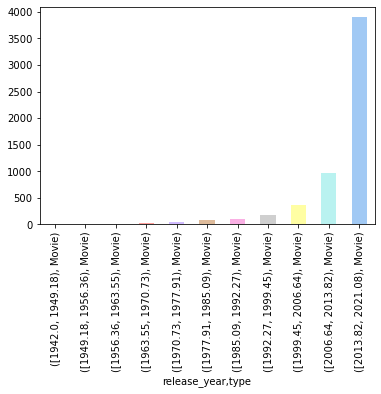

In [92]:
movies.groupby(years_m)['type'].value_counts().plot.bar(color = color)

### Number of movies released per decade

<AxesSubplot:xlabel='release_year,type'>

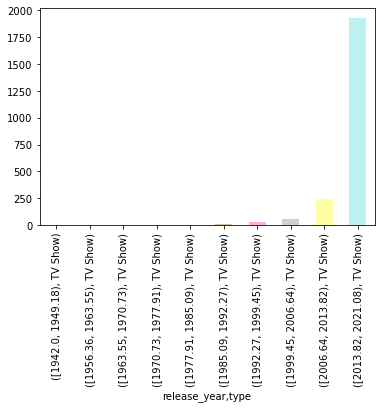

In [93]:
tv_shows.groupby(years_s, observed = True)['type'].value_counts().plot.bar(color = color)

## Now, let's get the percentage of movies genres and tv shows genres released per decade 

In [94]:
movies2 = movies.groupby(years_m)[[g + ' Genre' for g in ge]].sum()
movies2['total'] = movies2.sum(axis = 1)
tv_shows2 = tv_shows.groupby(years_s)[[g + ' Genre' for g in ge]].sum()
tv_shows2['total'] = tv_shows2.sum(axis = 1)

In [95]:
movies2 = movies2.apply(lambda x: x/movies2.total)
tv_shows2 = tv_shows2.apply(lambda x: x/tv_shows2.total)
movies2.drop('total', inplace = True, axis = 1)
tv_shows2.drop('total', inplace = True, axis = 1)
tv_shows2 = tv_shows2.fillna(0)

### Let's graph data.

## Movies

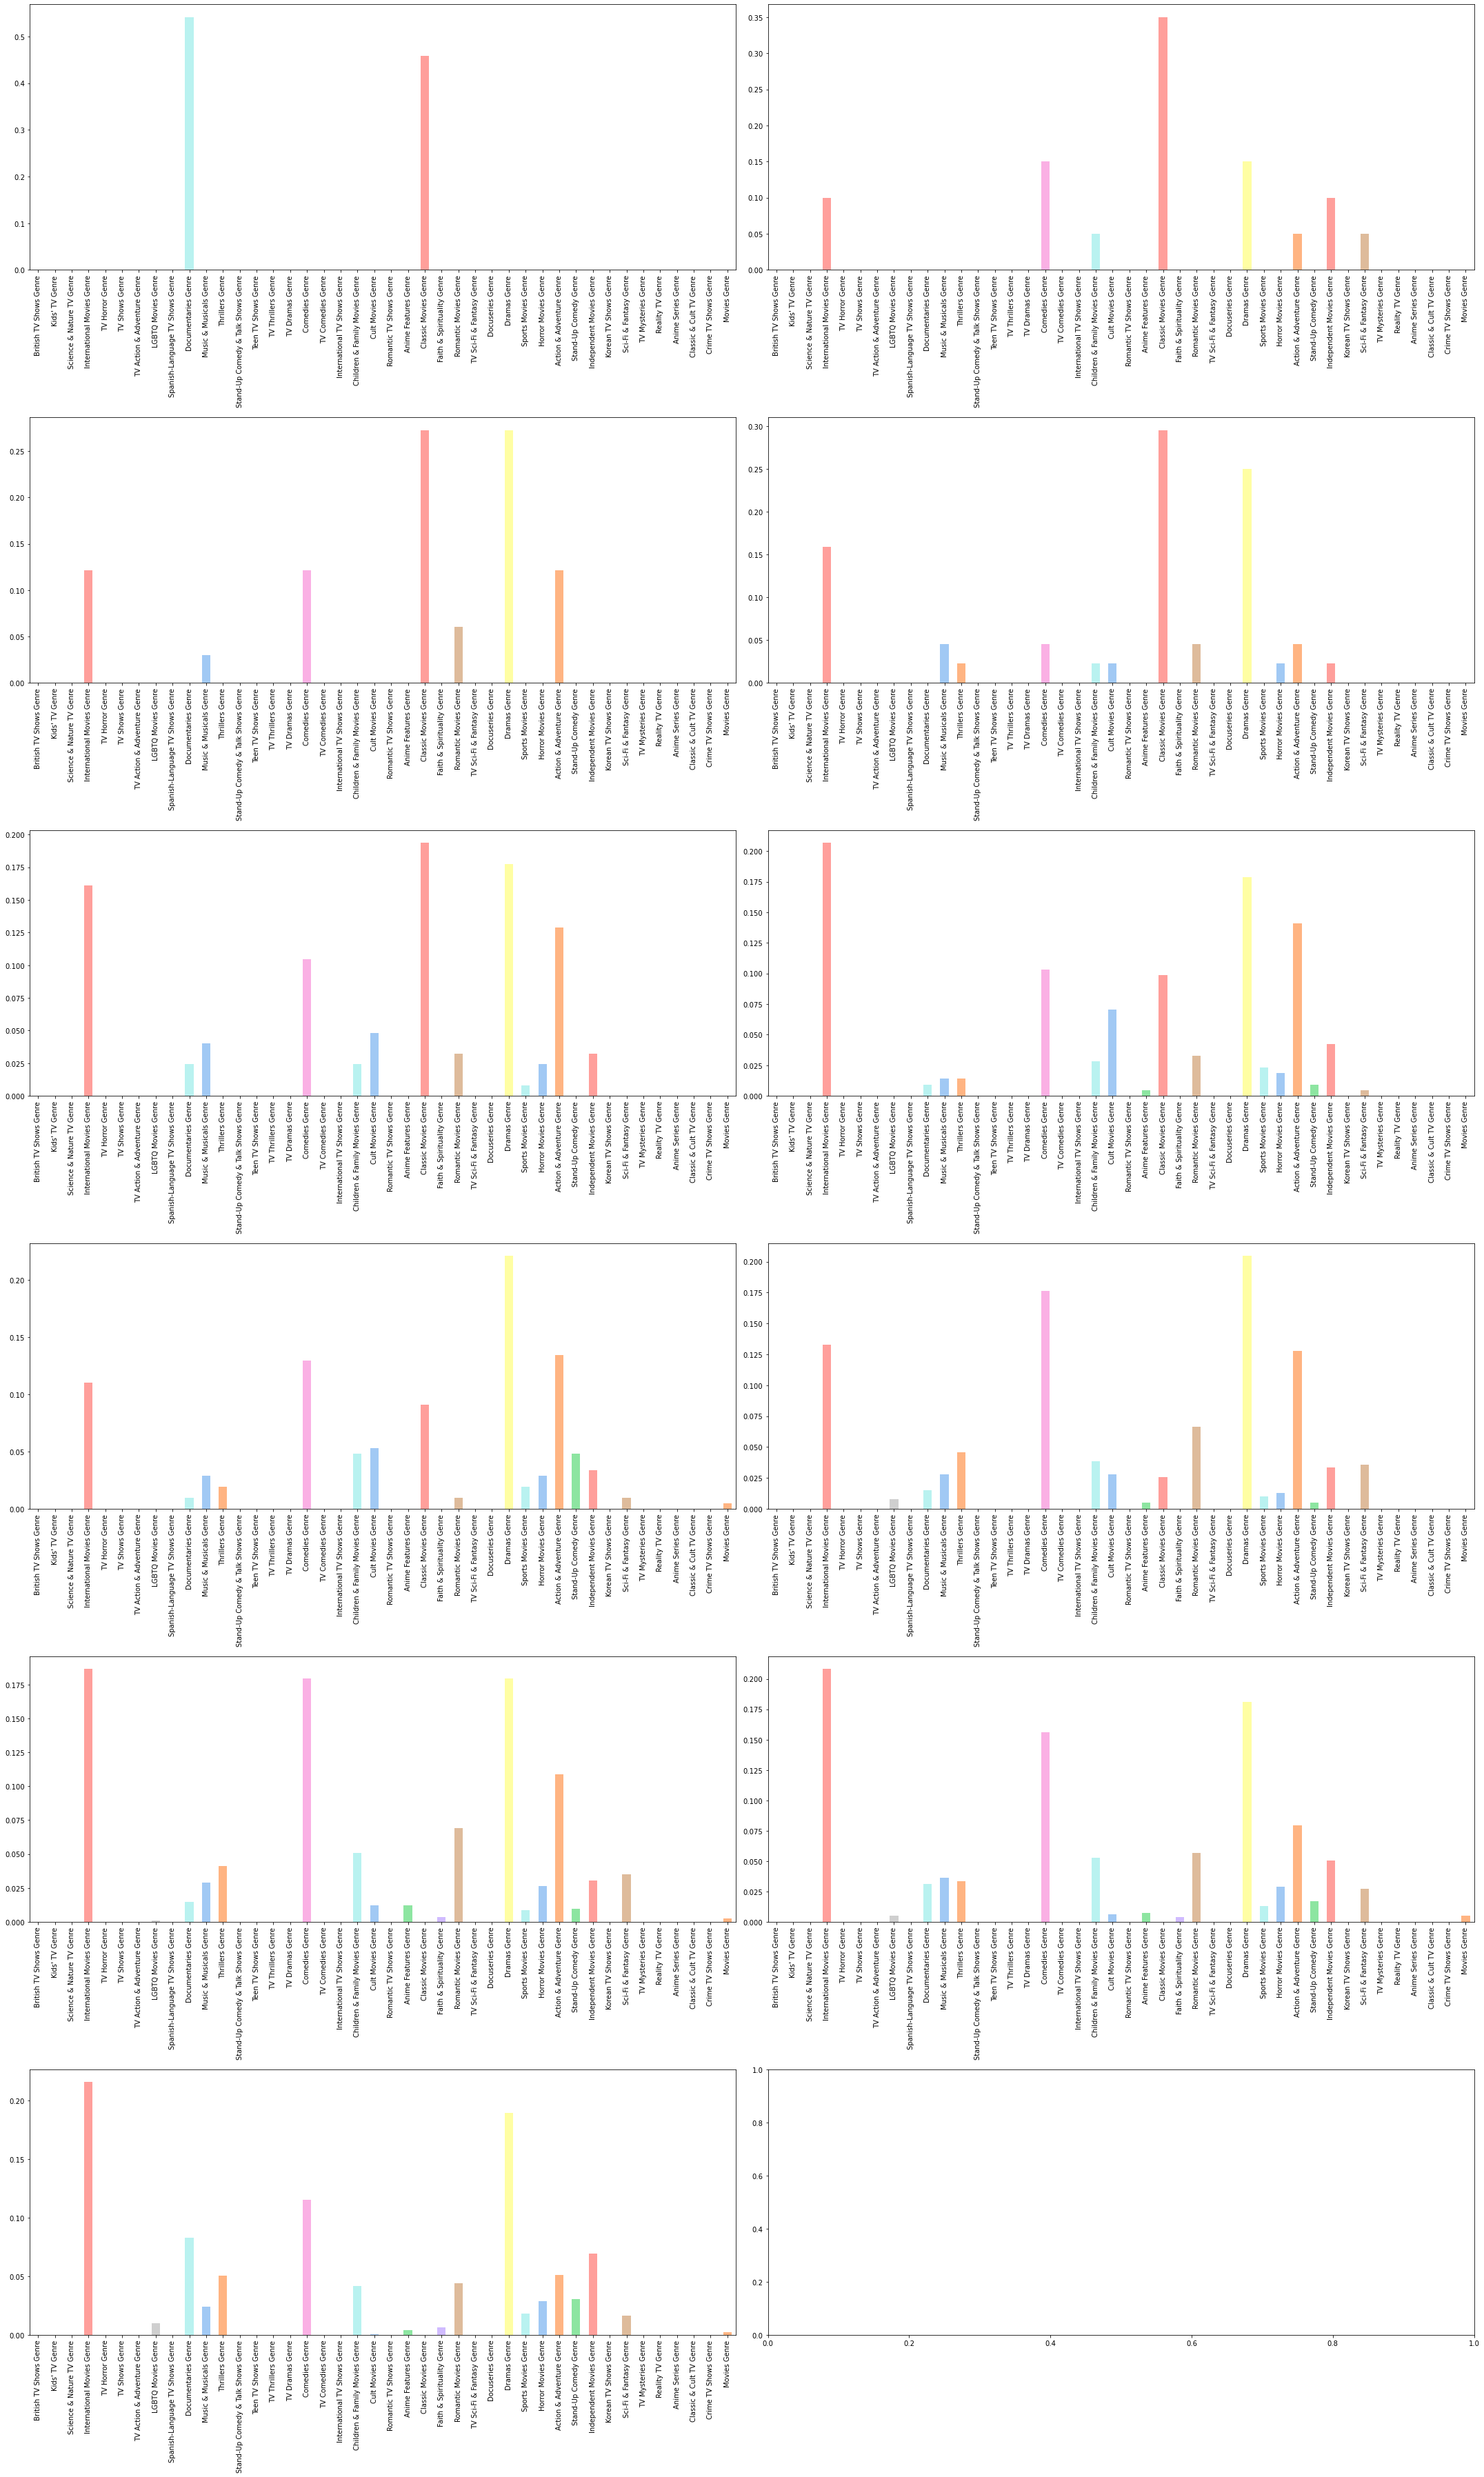

In [96]:
fig, ax = plt.subplots(6, 2, figsize = (30, 50))
ax = ax.ravel()
for i in range(len(movies2.index)):
    movies2.iloc[i].plot.bar(color = color, ax = ax[i])
fig.tight_layout()
plt.show()

#### Conclusions for movies genres

## Tv Shows

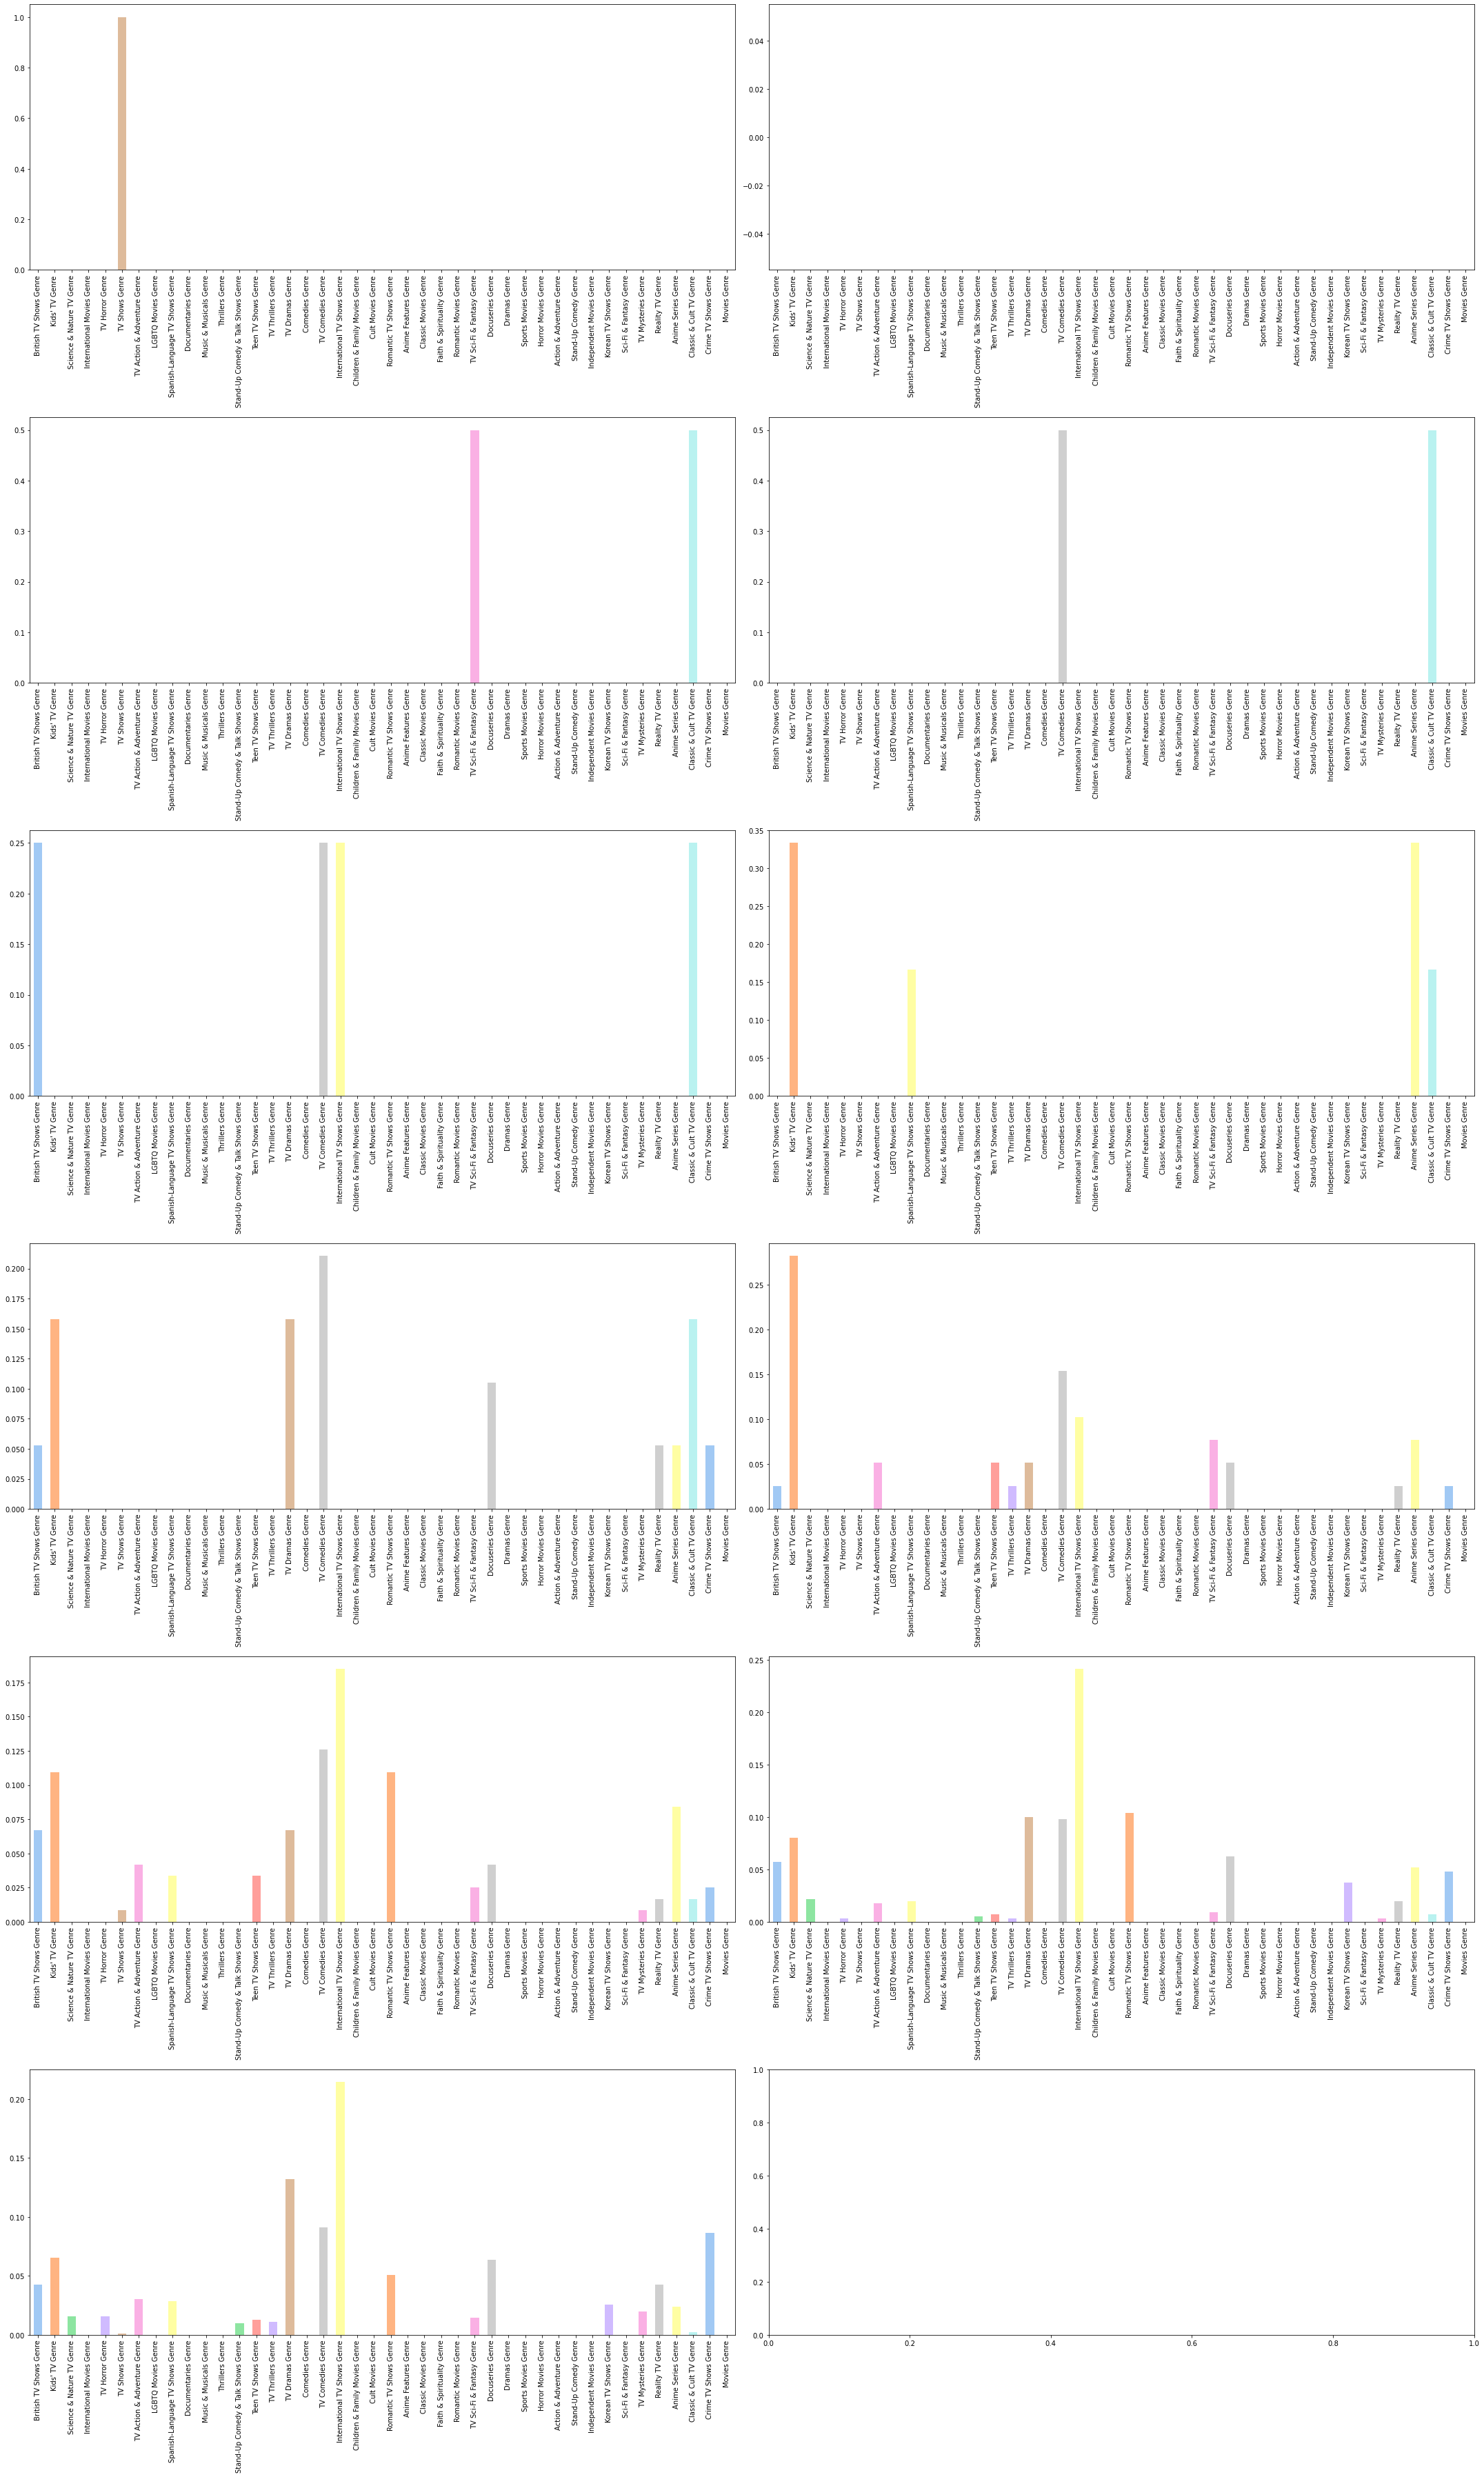

In [23]:
fig, ax = plt.subplots(6, 2, figsize=(30, 50))
ax = ax.ravel()
for i in range(len(tv_shows2.index)):
    tv_shows2.iloc[i].plot.bar(color = color, ax = ax[i])
fig.tight_layout()
plt.show()

#### Conclusions for tv shows genres

## Now we'll analyse the year in that movies were added

In [132]:
added_movie = df2[df2['type'] == 'Movie']
added_show = df2[df2['type'] == 'TV Show']
added_movie2 = added_movie.groupby('year_added')[[g + ' Genre' for g in ge]].sum()
added_show2 = added_show.groupby('year_added')[[g + ' Genre' for g in ge]].sum()

In [133]:
added_movie2['total'] = added_movie2.sum(axis=1)
added_show2['total'] = added_show2.sum(axis=1)

### Number of movies added per year

<AxesSubplot:xlabel='year_added'>

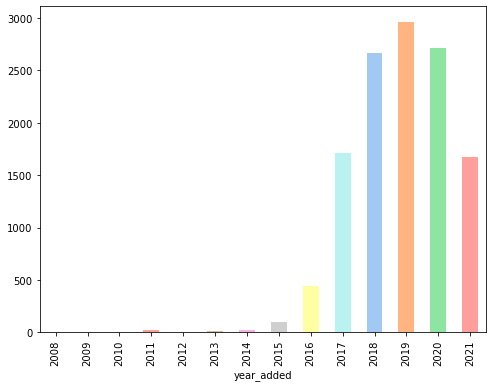

In [122]:
plt.figure(figsize = (8, 6))
added_movie2['total'].plot.bar(color = color)

#### Conclusions

### Number of Tv shows added per year

<AxesSubplot:xlabel='year_added'>

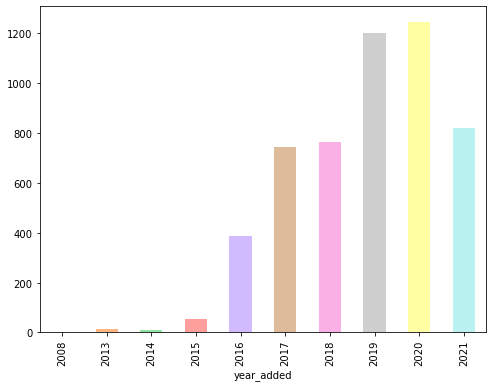

In [27]:
plt.figure(figsize=(8, 6))
added_show2['total'].plot.bar(color = color)

#### Conclusions

## Let's see the percentage of movies genres and tv shows genres added per decade

In [ ]:
added_movie2 = added_movie2.apply(lambda x: x/added_movie2.total)
added_show2 = added_show2.apply(lambda x: x/added_show2.total)
added_show2.drop('total', inplace = True, axis = 1)
added_movie2.drop('total', axis = 1, inplace = True)

## Let's graph

### Movies

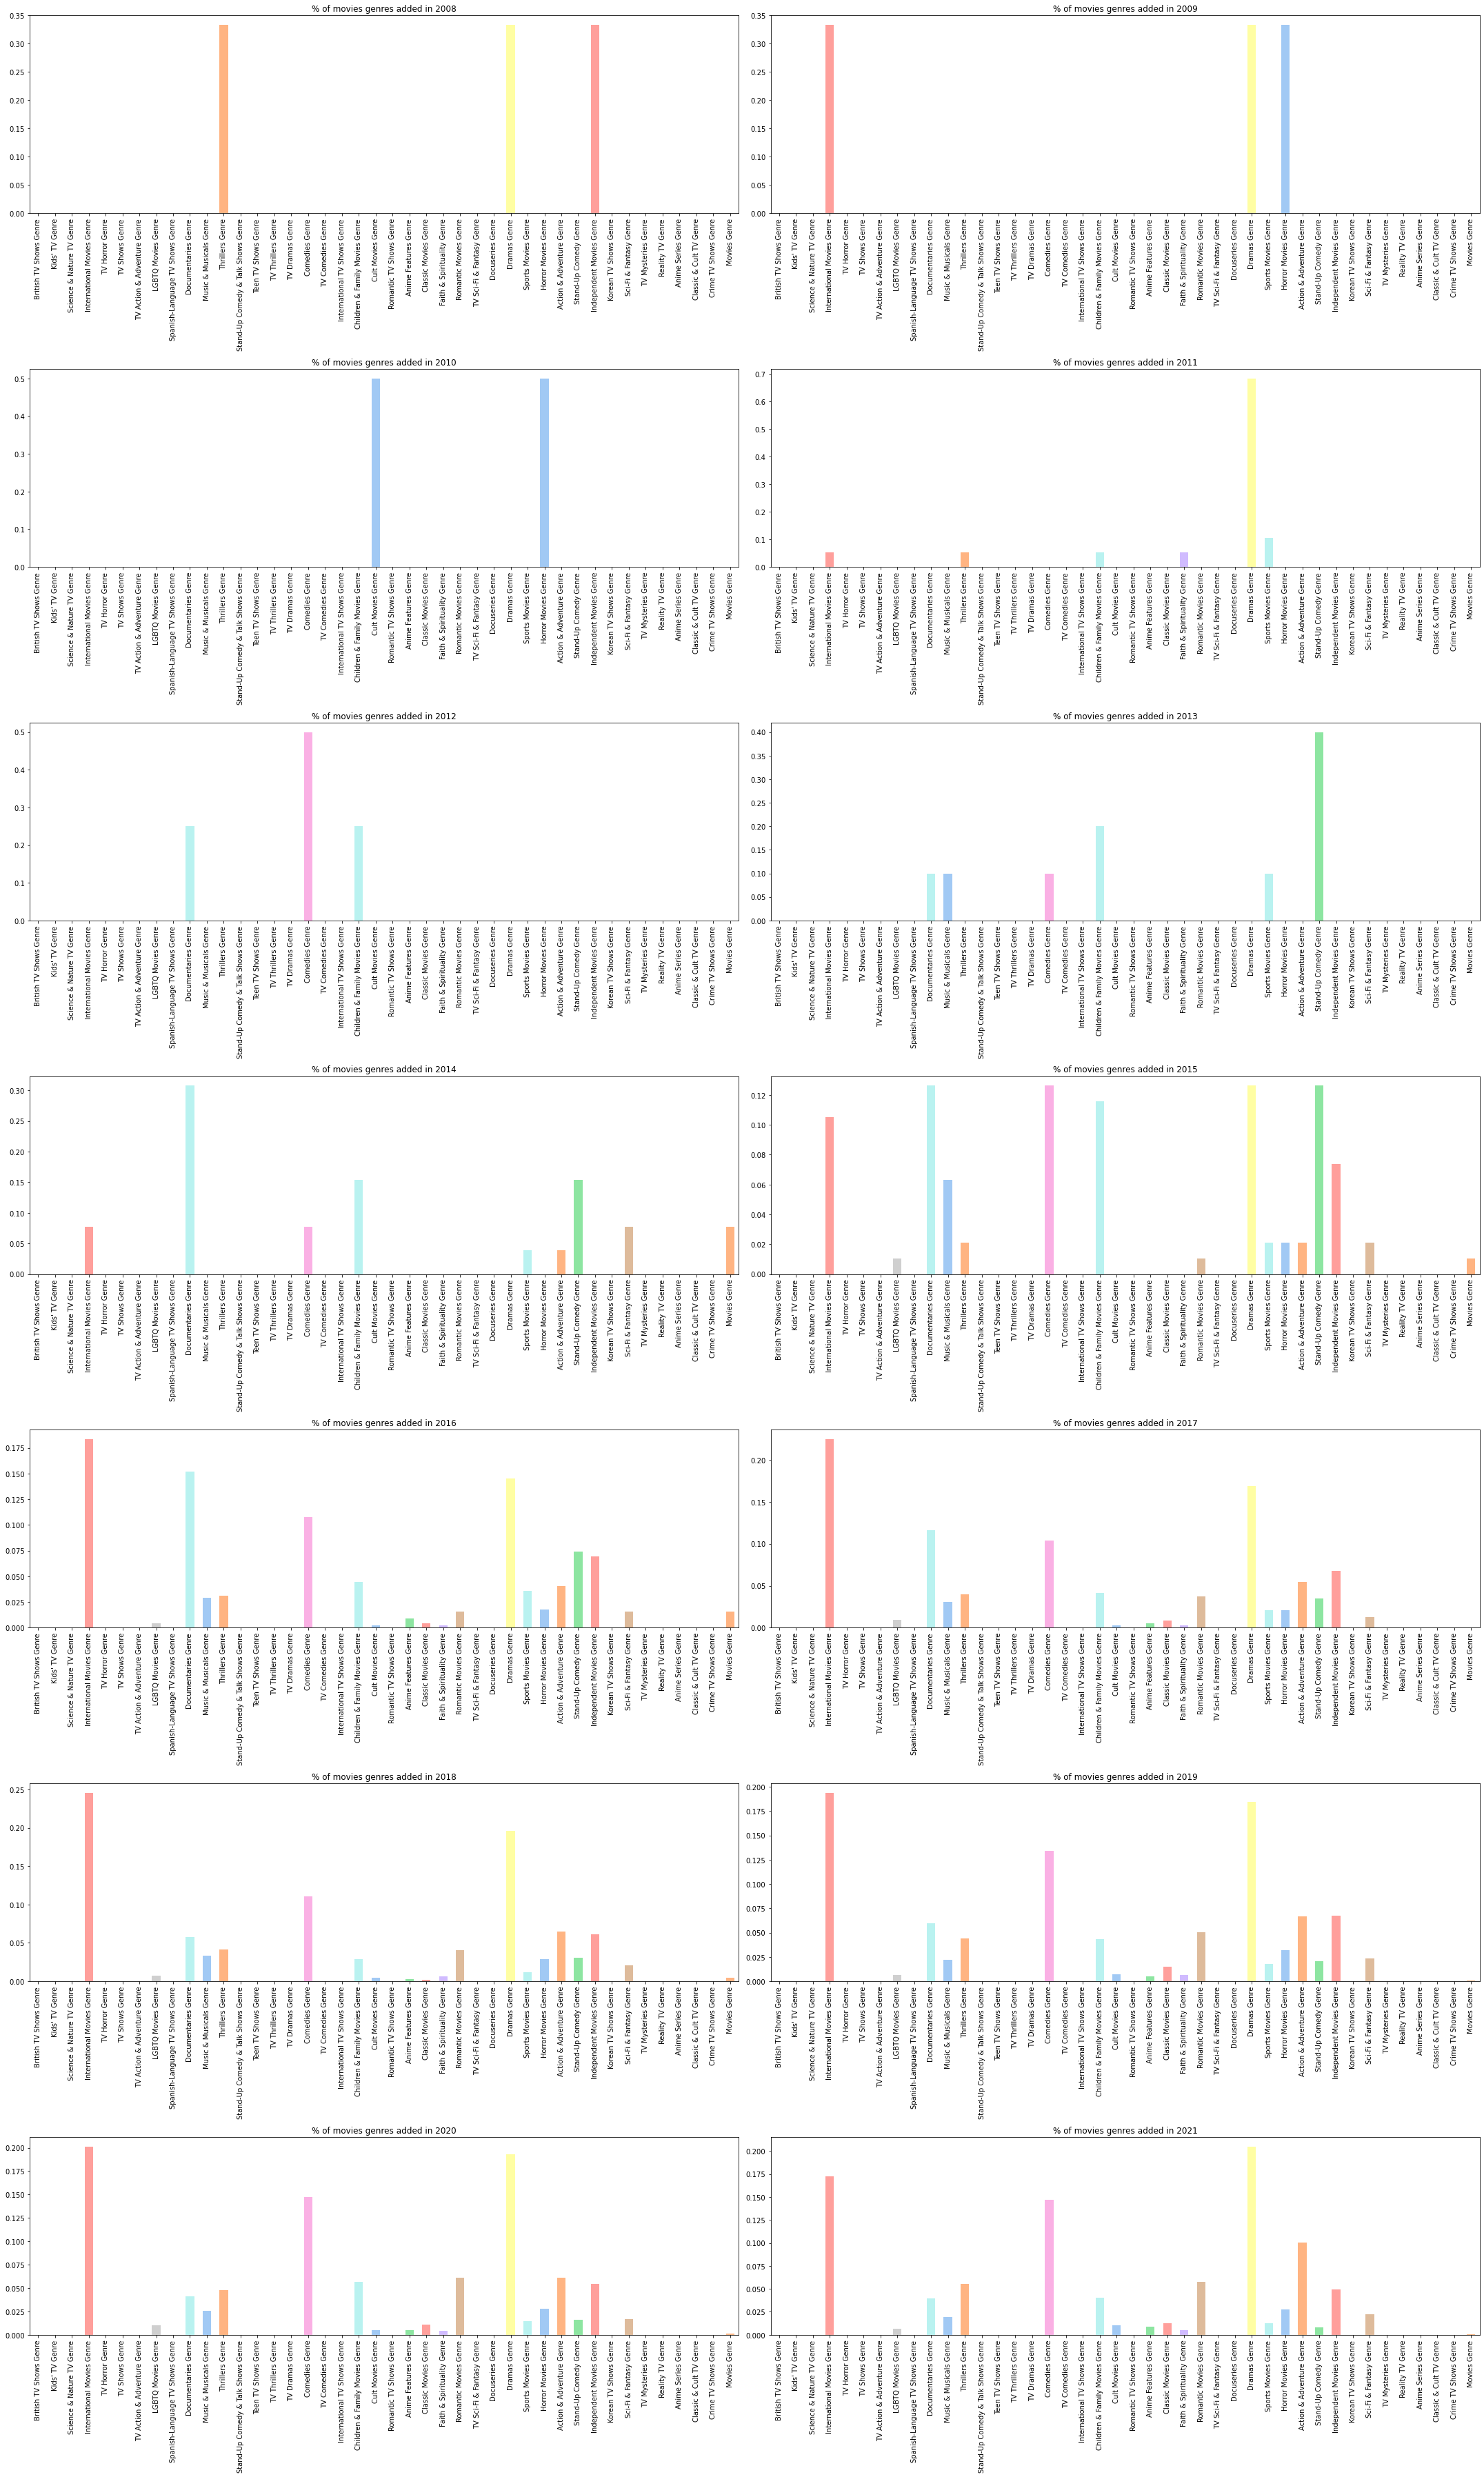

In [169]:
fig, ax = plt.subplots(7, 2, figsize=(30, 50))
ax = ax.ravel()
for i in range(len(added_movie2.index)):
    added_movie2.iloc[i].plot.bar(color = color, ax = ax[i])
    ax[i].title.set_text(f'% of movies genres added in {added_movie2.index[i]}')
plt.tight_layout()
plt.show()

### Tv Shows

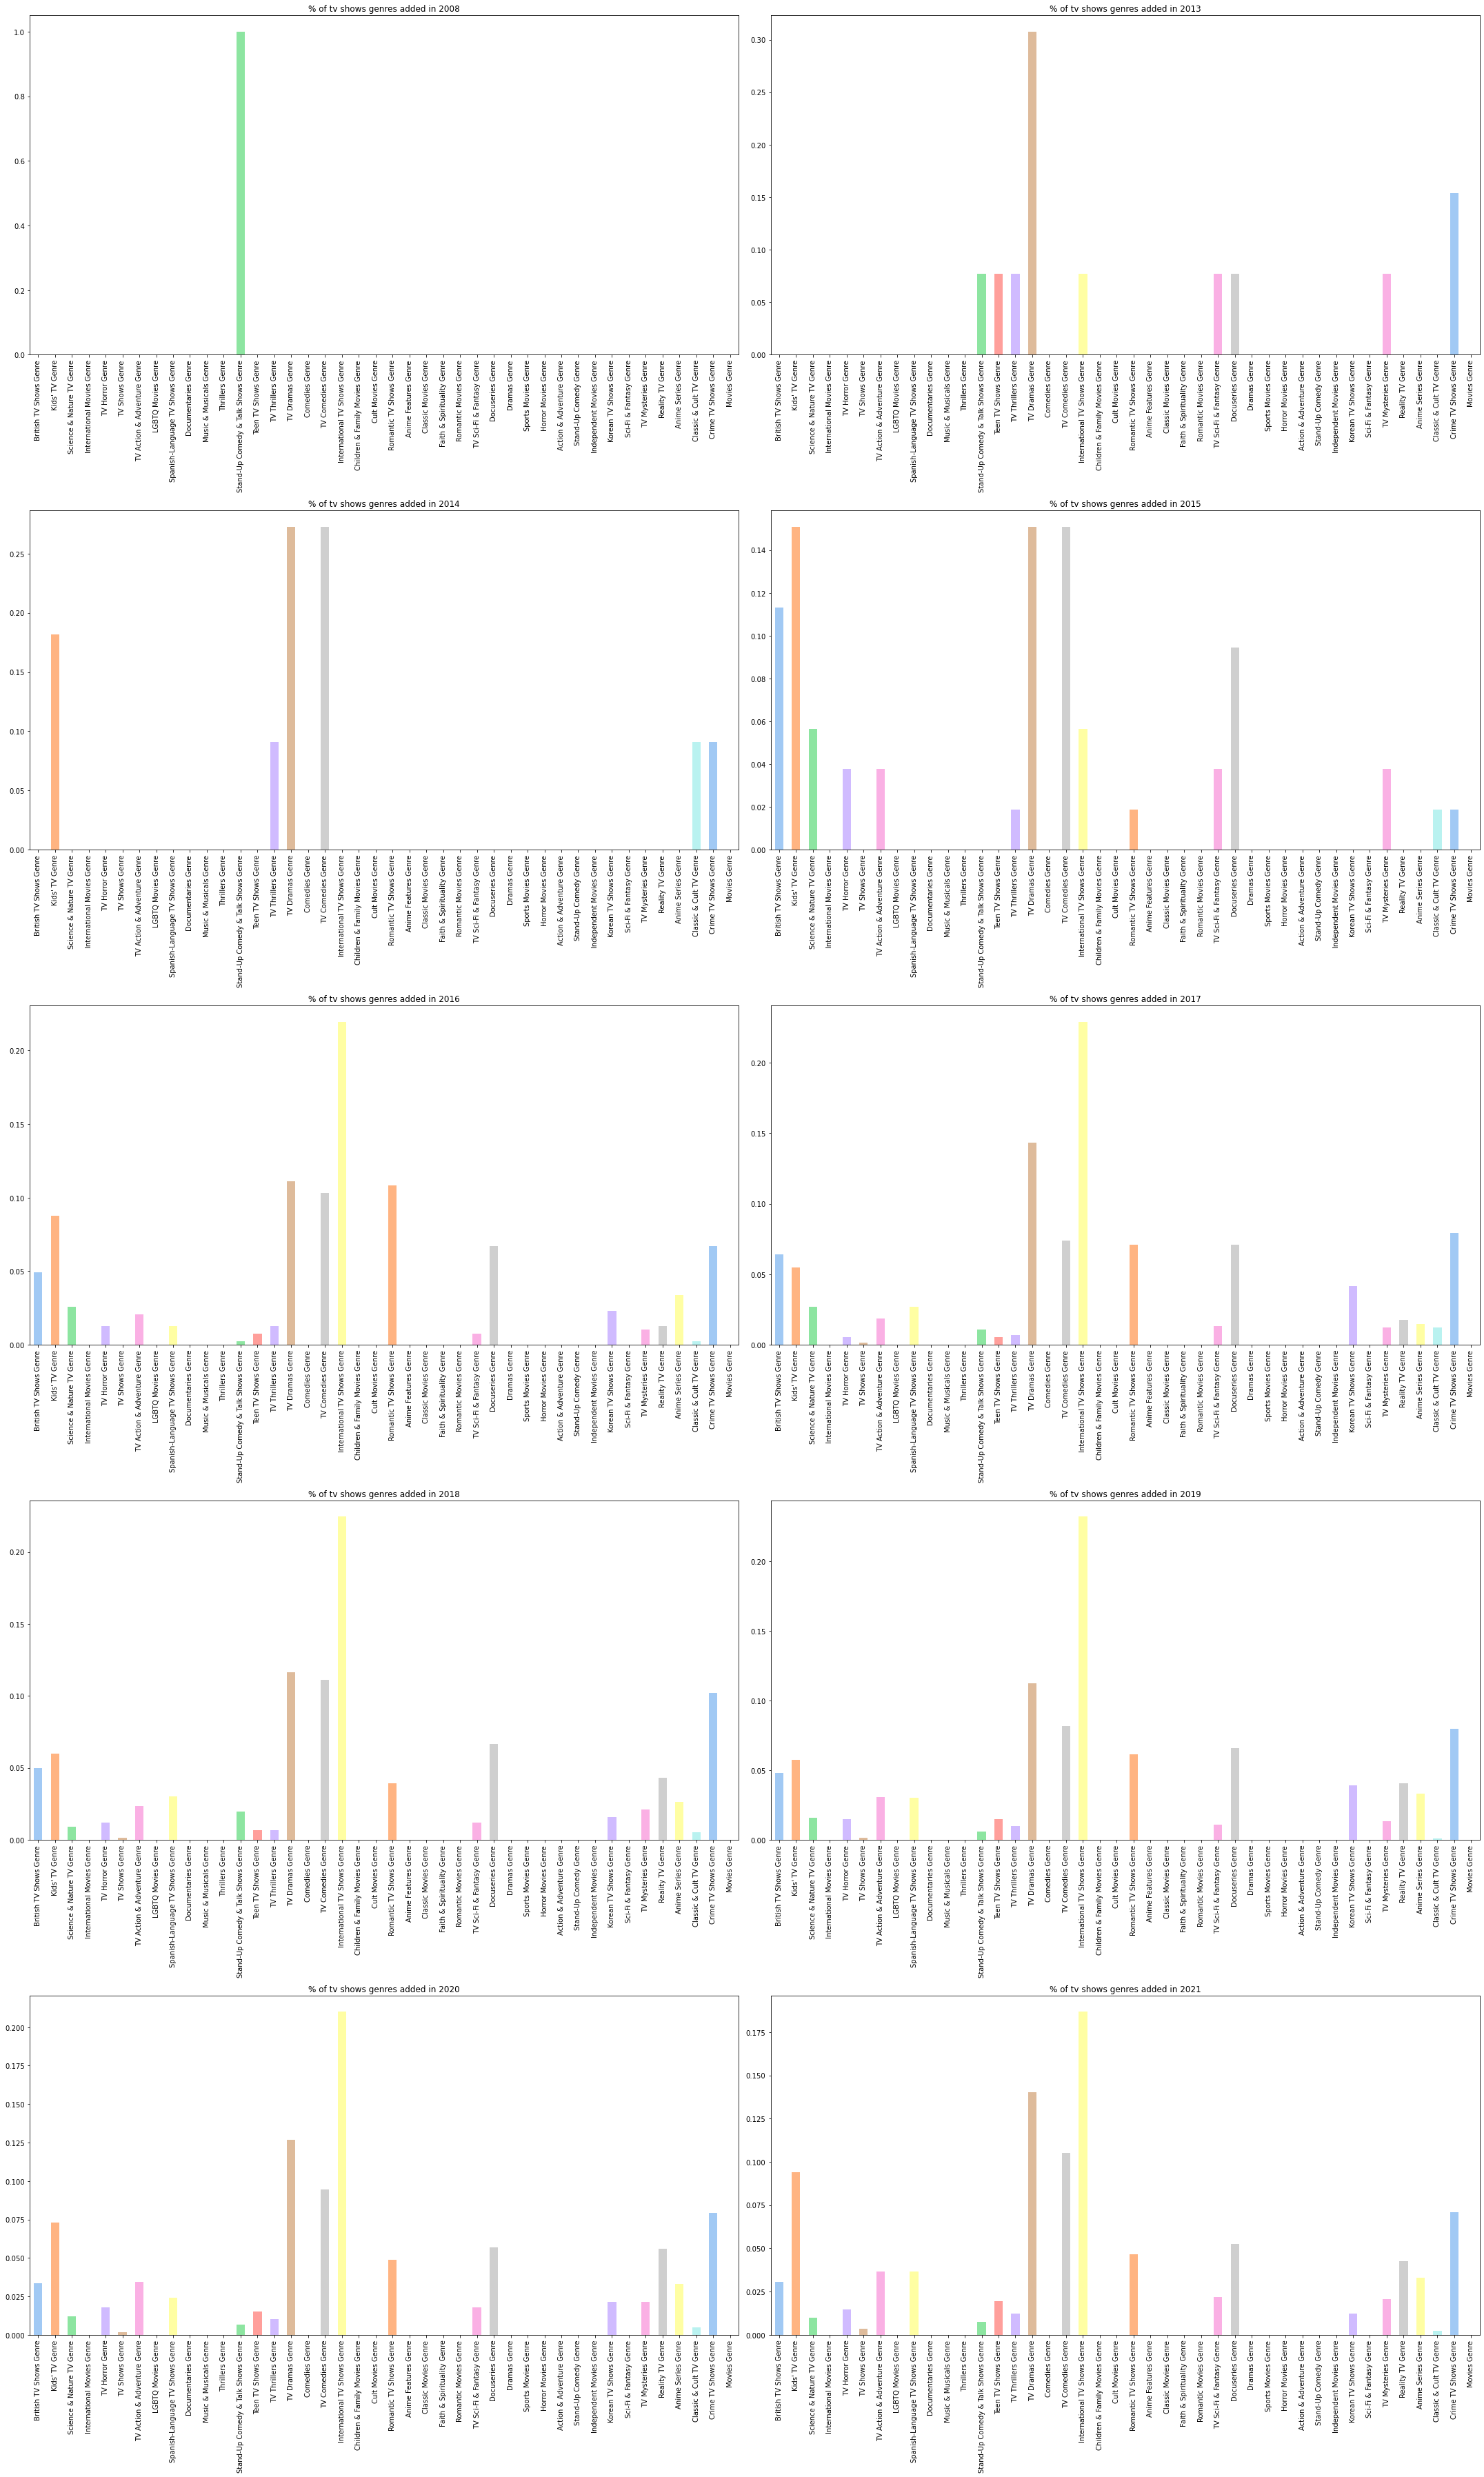

In [171]:
fig, ax = plt.subplots(5, 2, figsize=(30, 50))
ax = ax.ravel()
for i in range(len(added_show2.index)):
    added_show2.iloc[i].plot.bar(color = color, ax = ax[i])
    ax[i].title.set_text(f'% of tv shows genres added in {added_show2.index[i]}')
plt.tight_layout()
plt.show()

## ¿What type of content was more added on netflix?

In [185]:
print(f'{round(len(added_movie)/len(df2) * 100, 2)}% of the added content on netflix are movies. The other ' + 
      f'{round(len(added_show)/len(df2) * 100, 2)}% of the added content on netflix are tv shows.')

71.44% of the added content on netflix are movies. The other 28.56% of the added content on netflix are tv shows.


# Analysis of countries where were made movies and tv shows

In [235]:
movies_co = df2[df2['type'] == 'Movie'].copy()
show_co = df2[df2['type'] == 'TV Show'].copy()
movies_co_val = movies_co.country.values
show_co_val = show_co.country.values

### Let's extract all countries 

### Countries of the movies

In [377]:
m_co = []
for i in range(len(movies_co_val)):
    countries = movies_co_val[i]
    m_co += countries.split(', ')
m_co.remove('')
countries_m = pd.DataFrame({'country': m_co})

### Countries of the shows 

In [378]:
s_co = []
for i in range(len(show_co_val)):
    countries = show_co_val[i]
    s_co += countries.split(', ')
s_co.remove('')
countries_s = pd.DataFrame({'country': s_co})

Funcion to get alpha 3 of countries to can graph them

In [379]:
import pycountry

def get_alpha_3(country):
    try:
        return pycountry.countries.get(name=country).alpha_3
    except:
        return None

#### Extracting alpha 3 of countries

In [380]:
countries_s.country = countries_s.country.apply(lambda x: get_alpha_3(x))
countries_m.country = countries_m.country.apply(lambda x: get_alpha_3(x))

In [381]:
countries_s2 = pd.DataFrame({'country': countries_s.country.value_counts().index})
countries_s2['total'] = countries_s.value_counts().values
countries_m2 = pd.DataFrame({'country': countries_m.country.value_counts().index})
countries_m2['total'] = countries_m.country.value_counts().values

### Maps of countries of the movies

In [401]:
import plotly.express as px

fig = px.choropleth(countries_s2, 
                    locations='country', 
                    color = 'total', 
                    hover_name='country', 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [402]:
fig = px.choropleth(countries_m2, 
                   locations='country',
                   color = 'total',
                   hover_name = 'country',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.show()